In [1]:
%matplotlib inline

In [2]:
import sympy
sympy.init_printing()

# First-order system with proportional control

In [63]:
s = sympy.Symbol('s')
tau = sympy.Symbol('tau', positive=True)

In [83]:
G = 1/(tau*s + 1)
G

In [84]:
K_C = sympy.Symbol('K_C', positive=True)

In [85]:
G_OL = G*K_C

In [86]:
def feedback(forward, backward):
    loop = forward*backward
    return sympy.simplify(forward/(1 + loop))

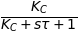

In [87]:
G_CL = feedback(G_OL, 1)
G_CL

In [88]:
t = sympy.Symbol('t', positive=True)

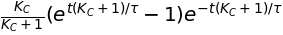

In [89]:
general_timeresponse = sympy.inverse_laplace_transform(sympy.simplify(G_CL/s), s, t)
general_timeresponse

In [90]:
import numpy

In [91]:
import matplotlib.pyplot as plt

In [92]:
y_func = sympy.lambdify((K_C, tau, t), general_timeresponse, 'numpy')

In [93]:
smootht = numpy.linspace(0, 5)

In [94]:
def response(K_C, tau):
    y = y_func(K_C, tau, smootht)
    e = 1 - y
    plt.subplot(2, 1, 1)
    plt.plot(smootht, y)
    plt.ylabel('Setpoint and y')
    plt.axhline(1)
    plt.subplot(2, 1, 2)
    plt.plot(smootht, e)
    plt.ylabel('Error')

In [95]:
from ipywidgets import interact

In [96]:
interact(response, K_C=(0, 100), tau=(0, 20))

A Jupyter Widget

<function __main__.response>

## Offset as function of gain

In [118]:
r = 1/s

In [119]:
y = r*G_CL

In [120]:
e = r - y

Use the final value statement to obtain eventual offset:

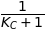

In [126]:
steady_offset = sympy.limit(s*e, s, 0)
steady_offset

Note the steady state offset is not a function of the system dynamics (time constant).

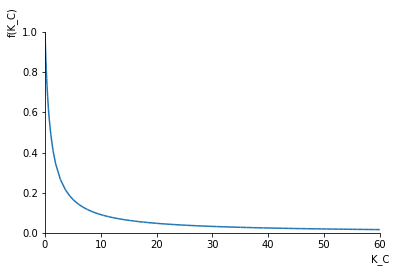

In [125]:
sympy.plot(steady_offset, (K_C, 0, 60))

Second order system with proportional control
---------------------------------------------

In [17]:
import matplotlib.pyplot as plt

In [18]:
zeta = sympy.Symbol('zeta')

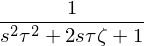

In [19]:
G = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

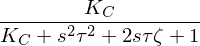

In [20]:
G_CL = feedback(G*K, 1)
G_CL

In [21]:
def response(new_K_C, new_tau, new_zeta):
    real_CL = G_CL.subs({K_C: new_K_C, tau: new_tau, zeta: new_zeta})
    timeresponse = sympy.inverse_laplace_transform(sympy.simplify(real_CL/s), s, t)
    sympy.plot(timeresponse, 1, (t, 0, 10))
    poles = sympy.solve(sympy.denom(sympy.simplify(real_CL)), s)
    plt.plot([sympy.re(p) for p in poles], [sympy.im(p) for p in poles], 'x', markersize=10)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.axis([-5, 5, -5, 5])

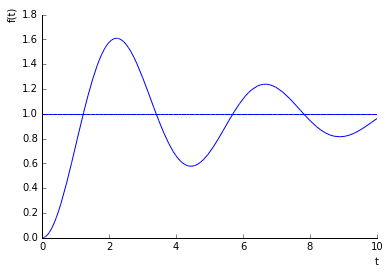

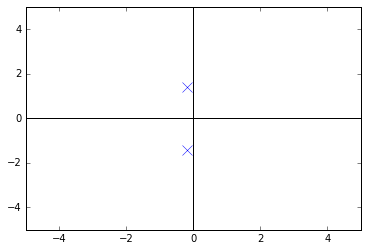

In [22]:
interact(response, new_K_C=(0, 100), new_tau=(0, 10.), new_zeta=(0, 2.));